In [22]:
%matplotlib inline

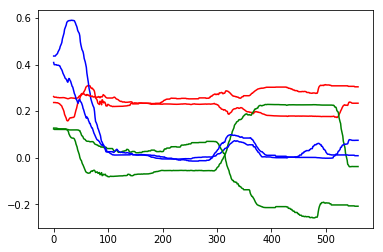

In [23]:
#### read in the txt file
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt
raw_data = np.loadtxt('../data/spoon_poses_both.txt', delimiter=',')
plt.plot(raw_data[:,(1,2,3,8,9,10)])

In [24]:
import transforms3d as t3d
q = [0, 0, 0, 1] # 180 degree rotation around z axis (w,x,y,z)
M = t3d.quaternions.quat2mat(q) # from this module
T = [[0.45, 0.06, 0]]
transform = np.concatenate((np.concatenate((M,np.transpose(T)),1),[[0,0,0,1]]))
transform

array([[-1.  ,  0.  ,  0.  ,  0.45],
       [ 0.  , -1.  ,  0.  ,  0.06],
       [ 0.  ,  0.  ,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  ]])

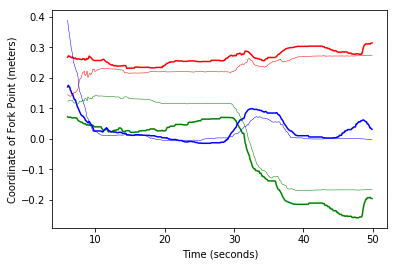

In [25]:
time = np.size(raw_data,0)

homogeneous_follower = np.transpose(np.concatenate((raw_data[:,1:4],np.ones((time,1))),1))
follower = np.transpose(np.dot(transform, homogeneous_follower))
follower.shape
same_frame_data = np.concatenate((raw_data[:,8:11],follower[:,0:3]),1)
from cycler import cycler
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = cycler(color='rgb')

relevant_indices = range(60,500)
plt.plot(raw_data[relevant_indices,0] - raw_data[0,0],raw_data[relevant_indices,8:11])
plt.plot(raw_data[relevant_indices,0] - raw_data[0,0],follower[relevant_indices,0:3],linewidth=0.5)
plt.xlabel("Time (seconds)")
plt.ylabel("Coordinate of Fork Point (meters)");

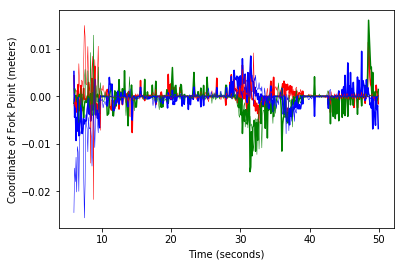

In [26]:
incremental_observations = raw_data[1:,:] - raw_data[:-1,:]
incremental_follower = follower[1:,:] - follower[:-1,:]
plt.plot(raw_data[relevant_indices,0] - raw_data[0,0],incremental_observations[relevant_indices,8:11])
plt.plot(raw_data[relevant_indices,0] - raw_data[0,0],incremental_follower[relevant_indices,0:3],linewidth=0.5)
plt.xlabel("Time (seconds)")
plt.ylabel("Coordinate of Fork Point (meters)");

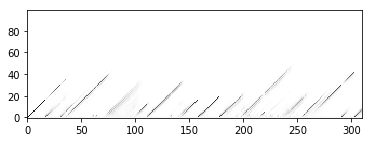

In [40]:
num_variables = 1
apriori_n = 3.0
apriori_mean = np.zeros(num_variables)
apriori_ssd = np.ones(num_variables) * 2 / 1000000
model_generator = gm.GaussianPredictor(num_variables, apriori_n, apriori_mean, apriori_n / 2, apriori_ssd / 2).Fit
max_duration = 311
reset_prob = 1/(30)
in_data = incremental_observations[250:,10:11]
plt.plot(in_data)

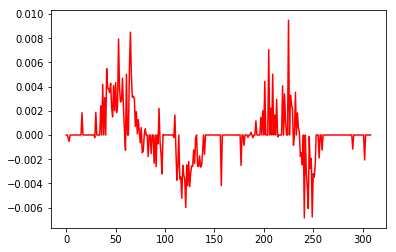

In [38]:
change_detector = chd.ChangepointDetector(in_data, reset_prob, model_generator, max_duration)
result_probs = change_detector.ModelChangepoints()
plt.imshow(np.transpose(1-result_probs[:,0:100]), cmap='gray', origin='lower')

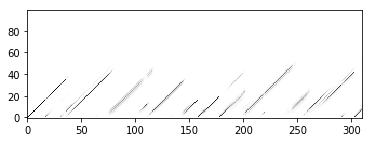

In [41]:
reset_prob = 1/(300)
change_detector = chd.ChangepointDetector(in_data, reset_prob, model_generator, max_duration)
result_probs = change_detector.ModelChangepoints()
plt.imshow(np.transpose(1-result_probs[:,0:100]), cmap='gray', origin='lower')

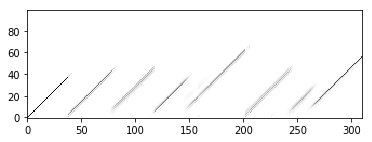

In [42]:
apriori_ssd = np.ones(num_variables) * 2 / 100000
model_generator = gm.GaussianPredictor(num_variables, apriori_n, apriori_mean, apriori_n / 2, apriori_ssd / 2).Fit
reset_prob = 1/(300)
change_detector = chd.ChangepointDetector(in_data, reset_prob, model_generator, max_duration)
result_probs = change_detector.ModelChangepoints()
plt.imshow(np.transpose(1-result_probs[:,0:100]), cmap='gray', origin='lower')

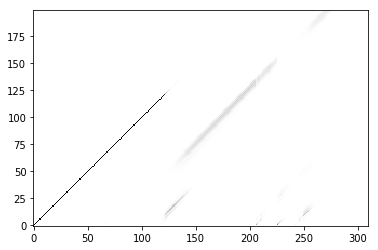

In [44]:
apriori_ssd = np.ones(num_variables) * 2 / 10000
model_generator = gm.GaussianPredictor(num_variables, apriori_n, apriori_mean, apriori_n / 2, apriori_ssd / 2).Fit
reset_prob = 1/(300)
change_detector = chd.ChangepointDetector(in_data, reset_prob, model_generator, max_duration)
result_probs = change_detector.ModelChangepoints()
plt.imshow(np.transpose(1-result_probs[:,0:200]), cmap='gray', origin='lower')

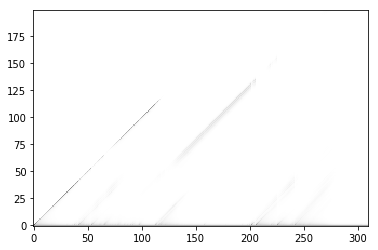

In [45]:
apriori_ssd = np.ones(num_variables) * 2 / 10000
model_generator = gm.GaussianPredictor(num_variables, apriori_n, apriori_mean, apriori_n / 2, apriori_ssd / 2).Fit
reset_prob = 1/(3)
change_detector = chd.ChangepointDetector(in_data, reset_prob, model_generator, max_duration)
result_probs = change_detector.ModelChangepoints()
plt.imshow(np.transpose(1-result_probs[:,0:200]), cmap='gray', origin='lower')

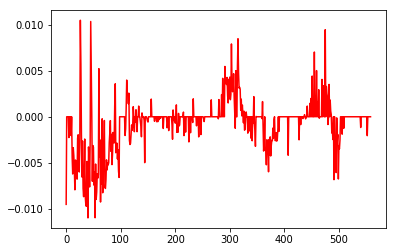

In [49]:
in_data = incremental_observations[:,10:11]
max_duration = in_data.shape[0]+1
plt.plot(in_data)

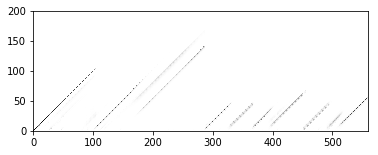

In [50]:
apriori_ssd = np.ones(num_variables) * 2 / 100000
model_generator = gm.GaussianPredictor(num_variables, apriori_n, apriori_mean, apriori_n / 2, apriori_ssd / 2).Fit
reset_prob = 1/(300)
change_detector = chd.ChangepointDetector(in_data, reset_prob, model_generator, max_duration)
result_probs = change_detector.ModelChangepoints()
plt.imshow(np.transpose(1-result_probs[:,0:200]), cmap='gray', origin='lower')